# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM(Gradient Boosting Machines) 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

* 트리 계열의 알고리즘들은 Classifier에 강하다는 장점이 있다.

In [10]:
import numpy as np

from sklearn. datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz 
from graphviz import Source
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_9994/2574966537.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


## 파이썬 기반 XGBoost

In [11]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

# 파이썬에서 사용하는 XGBoost는 자기 고유의 DMatrix라는 Class를 갖고 있다
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [12]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds = 400

In [13]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, evals=evals)

# 'eval_metric':'logloss' 를 줬기 때문에 logloss로 training.
# train과 eval 각각 얼만큼의 loss가 떨어지는지 동작.

[17:01:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32223	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-logloss:0.16152
[17]	tr

In [14]:
import numpy as np

predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))  # 예측결과를 추정할 수 있는 확률 상위 10개

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [15]:
preds = [1 if x > 0.5 else 0 for x in predicts] # 0.5 이상이면 1 아니면 0
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [16]:
print("정확도 : {}" .format(accuracy_score(y_test, preds)))
print("정밀도 : {}" .format(precision_score(y_test, preds)))
print("재현율 : {}" .format(recall_score(y_test, preds)))

정확도 : 0.9736842105263158
정밀도 : 0.972972972972973
재현율 : 0.9863013698630136


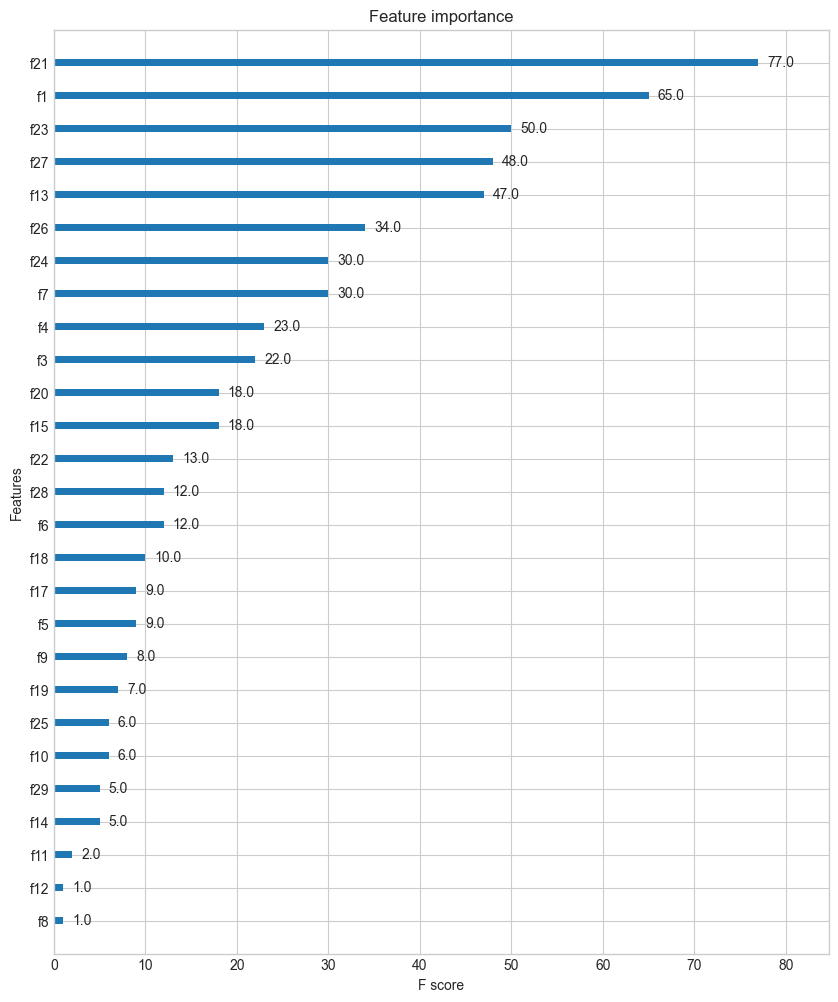

In [17]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax); # 어떤 Feature가 영향을 많이 미치는지 시각화할 수 있다

In [18]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

## XGB Classifier

### 붓꽃 데이터

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [ ]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)

print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.3880875587463379 (+/- 0.03442665002750592)
Average score time : 0.0007417201995849609 (+/- 1.9814864691826012e-05)
Average test score : 0.96 (+/- 0.024944382578492935)


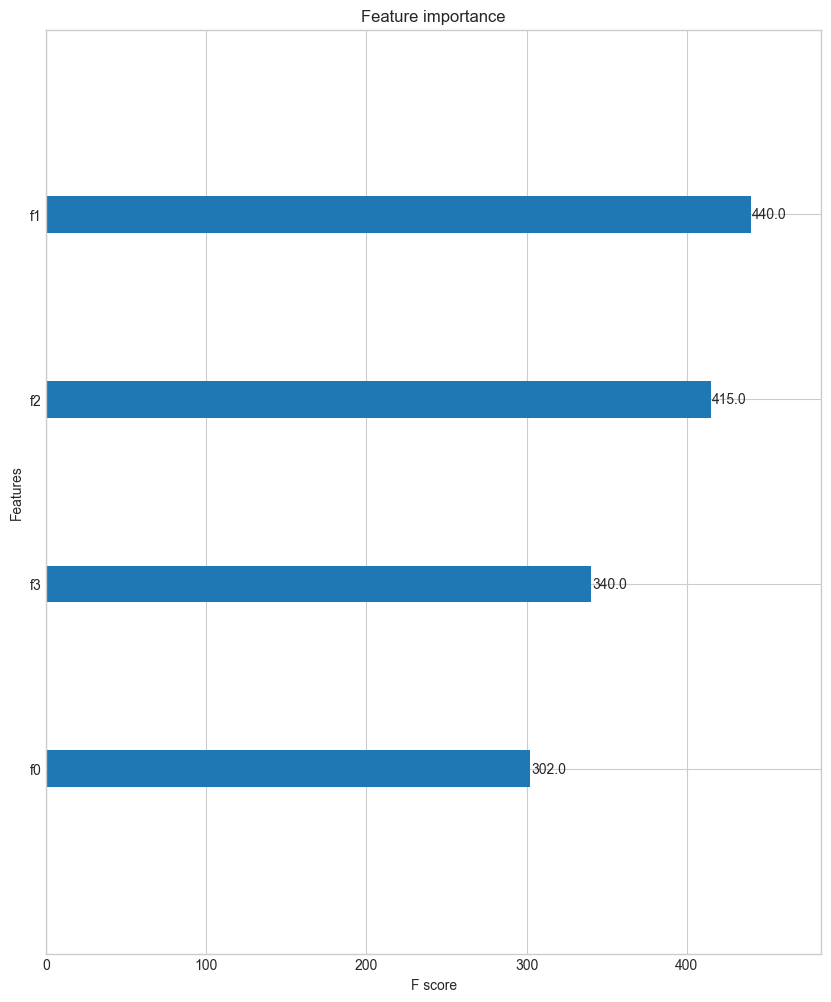

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax); # feature 중요도 출력

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

### 와인 데이터

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [ ]:
cross_val = cross_validate(
    estimator=xgbc,
    X=wine.data, y=wine.target,
    cv=5
)

print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.3375974178314209 (+/- 0.03776115755720251)
Average score time : 0.0008158683776855469 (+/- 8.124471227625903e-05)
Average test score : 0.9609523809523809 (+/- 0.028267341226138717)


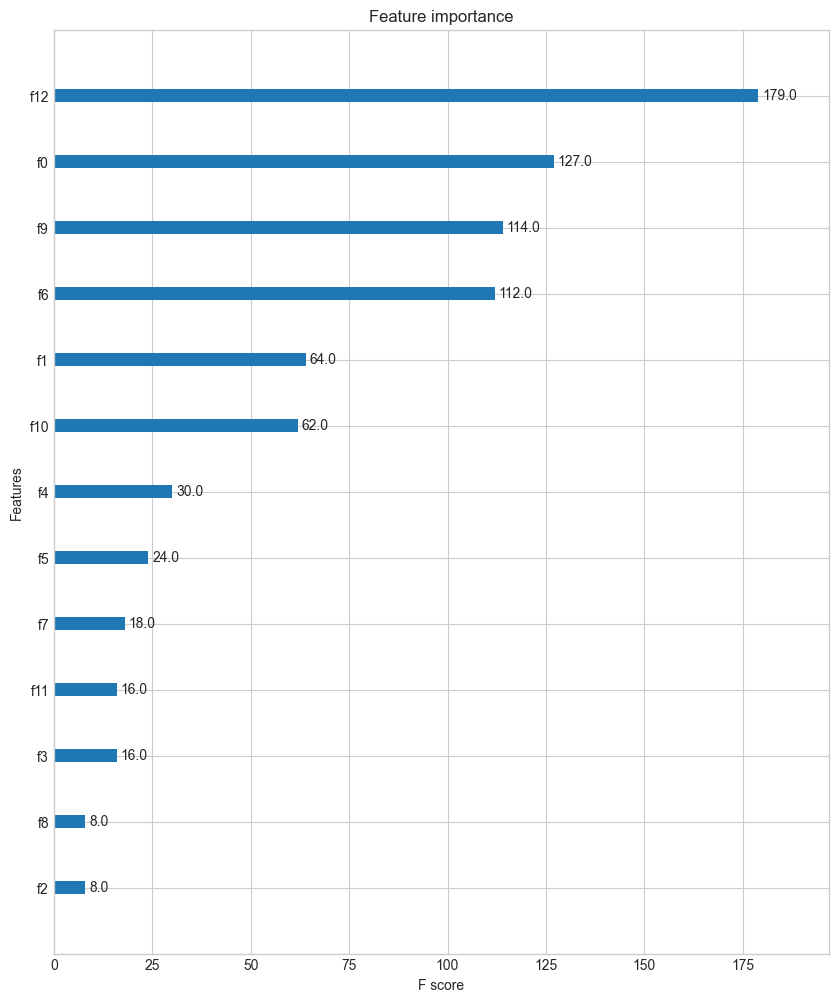

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax); # feature 중요도 출력

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)

In [ ]:
cross_val = cross_validate(
    estimator=xgbc,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.25048375129699707 (+/- 0.014341395151558745)
Average score time : 0.000979471206665039 (+/- 0.00010699586203186057)
Average test score : 0.9736376339077782 (+/- 0.009609619188189153)


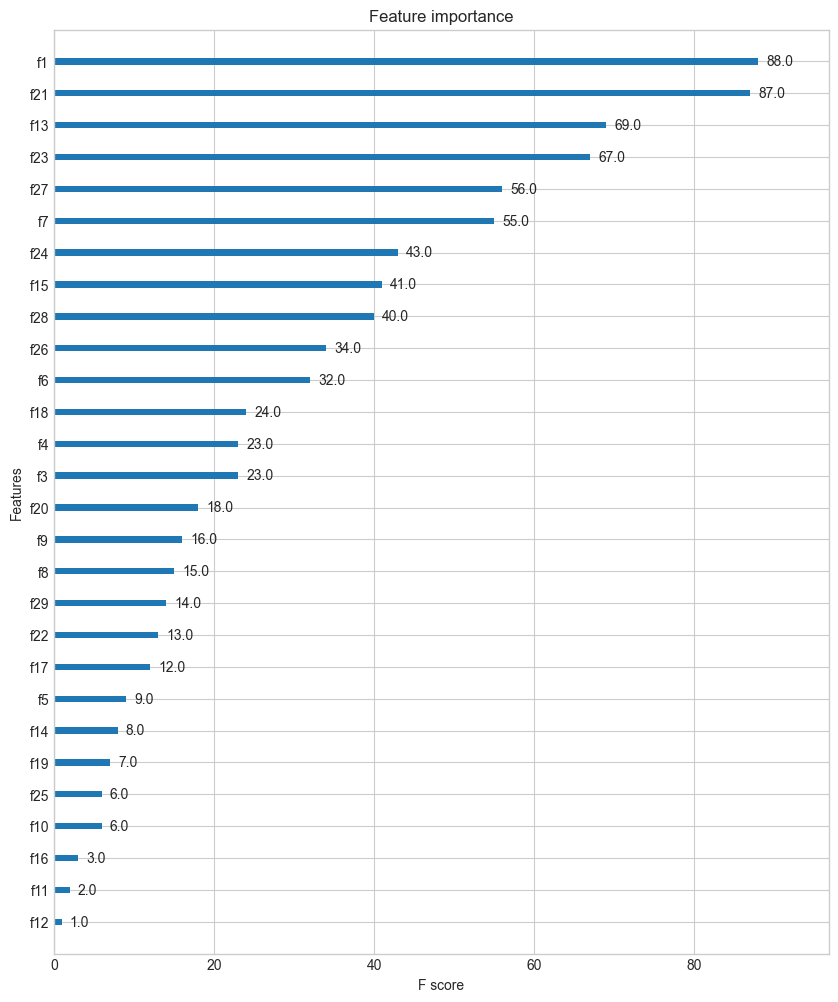

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax); # feature 중요도 출력

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

## XGB Regressor

### 당뇨병 데이터

In [ ]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [ ]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [ ]:
cross_val = cross_validate(
    estimator=xgbr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.21123123168945312 (+/- 0.02436506533255403)
Average score time : 0.0008433818817138672 (+/- 0.00012393149103089447)
Average test score : 0.2998837790950602 (+/- 0.07527155614299372)


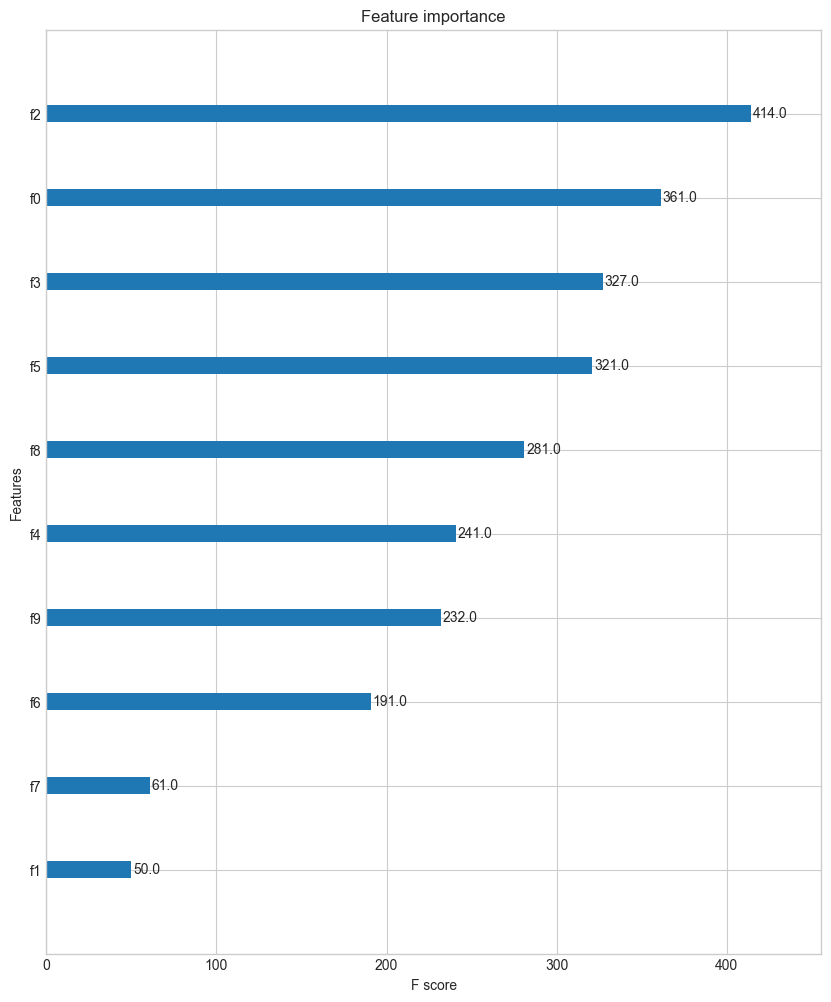

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax); # feature 중요도 출력

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'Source' object has no attribute 'splitlines'

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [24]:
import lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

ModuleNotFoundError: No module named 'lightgbm'

## LGBMClassifier

### 붓꽃 데이터

In [25]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [26]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test), (y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

NameError: name 'LGBMClassifier' is not defined

In [27]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)

print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

NameError: name 'lgbmc' is not defined

In [28]:
plot_metric(lgbmc) # logloss로 check하는데 학습이 얼만큼 됐는지, 어느구간에서 얼만큼 떨어졌는지

NameError: name 'plot_metric' is not defined

In [29]:
plot_importance(lgbmc, figsize(12, 10)); # feature 중요도 출력

NameError: name 'lgbmc' is not defined

In [ ]:
plot_tree(lgbmc, figsize=(28, 24));

AttributeError: 'Source' object has no attribute 'splitlines'

## LGBMRegressor

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [30]:
lgmbr = LGBMRegressor(n_estimators=400)
evals = [(X_test), (y_test)]
lgmbr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

NameError: name 'LGBMRegressor' is not defined

In [ ]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

NameError: name 'lgbmc' is not defined

In [ ]:
plot_metric(lgbmr) # logloss로 check하는데 학습이 얼만큼 됐는지, 어느구간에서 얼만큼 떨어졌는지

NameError: name 'plot_metric' is not defined

In [ ]:
plot_importance(lgbmr, figsize(12, 10)); # feature 중요도 출력

NameError: name 'lgbmc' is not defined

In [ ]:
plot_tree(lgbmr, figsize=(28, 24));

AttributeError: 'Source' object has no attribute 'splitlines'